# 1. Data Exploration and Initial Analysis

This notebook performs initial data loading, exploration, and visualization of the disaster tweet classification dataset.

## Objectives
- Load and examine the dataset structure
- Perform initial statistical analysis
- Visualize data distributions and patterns
- Identify data quality issues

In [11]:
%cd /mnt/ibrokeass/Github/disaster-tweet-classification/

/mnt/ibrokeass/Github/disaster-tweet-classification


In [12]:
import os

os.getcwd()

'/mnt/ibrokeass/Github/disaster-tweet-classification'

In [13]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import warnings
warnings.filterwarnings('ignore')

# Load configuration
with open('/mnt/ibrokeass/Github/disaster-tweet-classification/config/hyperparameters.json', 'r') as f:
    config = json.load(f)

# Set style
plt.style.use('seaborn-v0_8')
sns.set_palette('husl')

print("✅ Libraries imported successfully!")

✅ Libraries imported successfully!


## 1.1 Data Loading

In [14]:
# Load datasets
train_path = config['data_paths']['train_raw']
test_path = config['data_paths']['test_raw']

df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

print(f"Train shape: {df_train.shape}")
print(f"Test shape: {df_test.shape}")
print(f"\nTrain columns: {list(df_train.columns)}")
print(f"Test columns: {list(df_test.columns)}")

# Memory usage
train_memory = df_train.memory_usage().sum() / 1024**2
test_memory = df_test.memory_usage().sum() / 1024**2
print(f"\nTrain memory usage: {train_memory:.2f} MB")
print(f"Test memory usage: {test_memory:.2f} MB")

Train shape: (7613, 5)
Test shape: (3263, 4)

Train columns: ['id', 'keyword', 'location', 'text', 'target']
Test columns: ['id', 'keyword', 'location', 'text']

Train memory usage: 0.29 MB
Test memory usage: 0.10 MB


## 1.2 Data Overview

In [15]:
# Display first few rows
print("Training data sample:")
display(df_train.head())

print("\nTest data sample:")
display(df_test.head())

Training data sample:


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1



Test data sample:


,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [16]:
# Data types and missing values
print("Training data info:")
df_train.info()

print("\n" + "="*50 + "\n")
print("Missing values in train:")
print(df_train.isnull().sum())

print("\n" + "="*50 + "\n")
print("Missing values in test:")
print(df_test.isnull().sum())

Training data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


Missing values in train:
id             0
keyword       61
location    2533
text           0
target         0
dtype: int64


Missing values in test:
id             0
keyword       26
location    1105
text           0
dtype: int64


## 1.3 Class Distribution

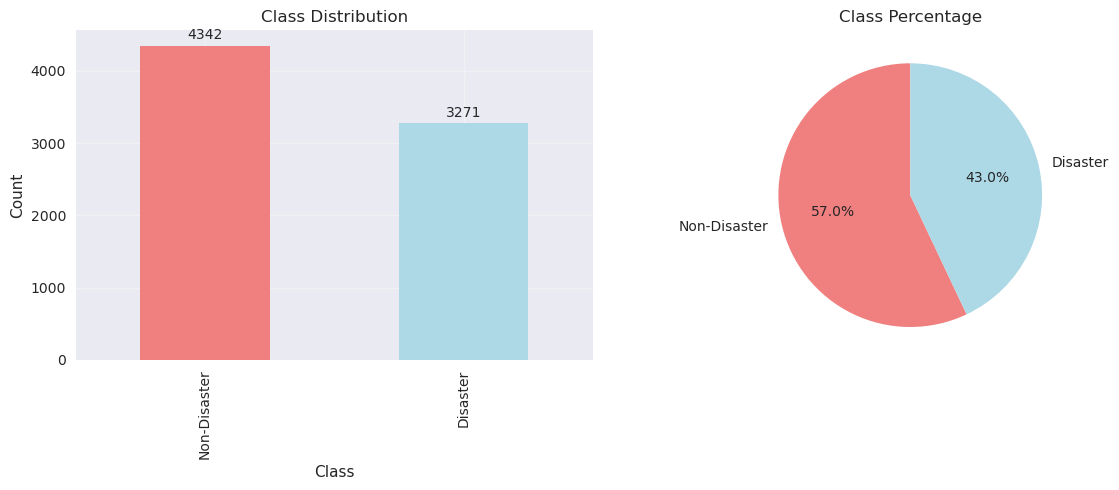

Class distribution:
Non-Disaster (0): 4342 (57.0%)
Disaster (1): 3271 (43.0%)


In [17]:
# Class distribution
class_counts = df_train['target'].value_counts()
class_percentages = df_train['target'].value_counts(normalize=True) * 100

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Bar plot
class_counts.plot(kind='bar', ax=ax1, color=['lightcoral', 'lightblue'])
ax1.set_title('Class Distribution')
ax1.set_xlabel('Class')
ax1.set_ylabel('Count')
ax1.set_xticks([0, 1])
ax1.set_xticklabels(['Non-Disaster', 'Disaster'])
ax1.grid(alpha=0.3)

# Add count labels
for i, count in enumerate(class_counts):
    ax1.text(i, count + 50, str(count), ha='center', va='bottom')

# Pie chart
ax2.pie(class_percentages, labels=['Non-Disaster', 'Disaster'], autopct='%1.1f%%',
        colors=['lightcoral', 'lightblue'], startangle=90)
ax2.set_title('Class Percentage')

plt.tight_layout()
plt.show()

print(f"Class distribution:")
print(f"Non-Disaster (0): {class_counts[0]} ({class_percentages[0]:.1f}%)")
print(f"Disaster (1): {class_counts[1]} ({class_percentages[1]:.1f}%)")

## 1.4 Text Length Analysis

In [18]:
# Add text length columns
df_train['text_length'] = df_train['text'].str.len()
df_train['word_count'] = df_train['text'].str.split().str.len()

df_test['text_length'] = df_test['text'].str.len()
df_test['word_count'] = df_test['text'].str.split().str.len()

# Text length statistics
print("Text length statistics (train):")
print(df_train['text_length'].describe())

print("\nWord count statistics (train):")
print(df_train['word_count'].describe())

Text length statistics (train):
count    7613.000000
mean      101.161697
std        33.854073
min         7.000000
25%        78.000000
50%       107.000000
75%       133.000000
max       157.000000
Name: text_length, dtype: float64

Word count statistics (train):
count    7613.000000
mean       14.903586
std         5.732604
min         1.000000
25%        11.000000
50%        15.000000
75%        19.000000
max        31.000000
Name: word_count, dtype: float64


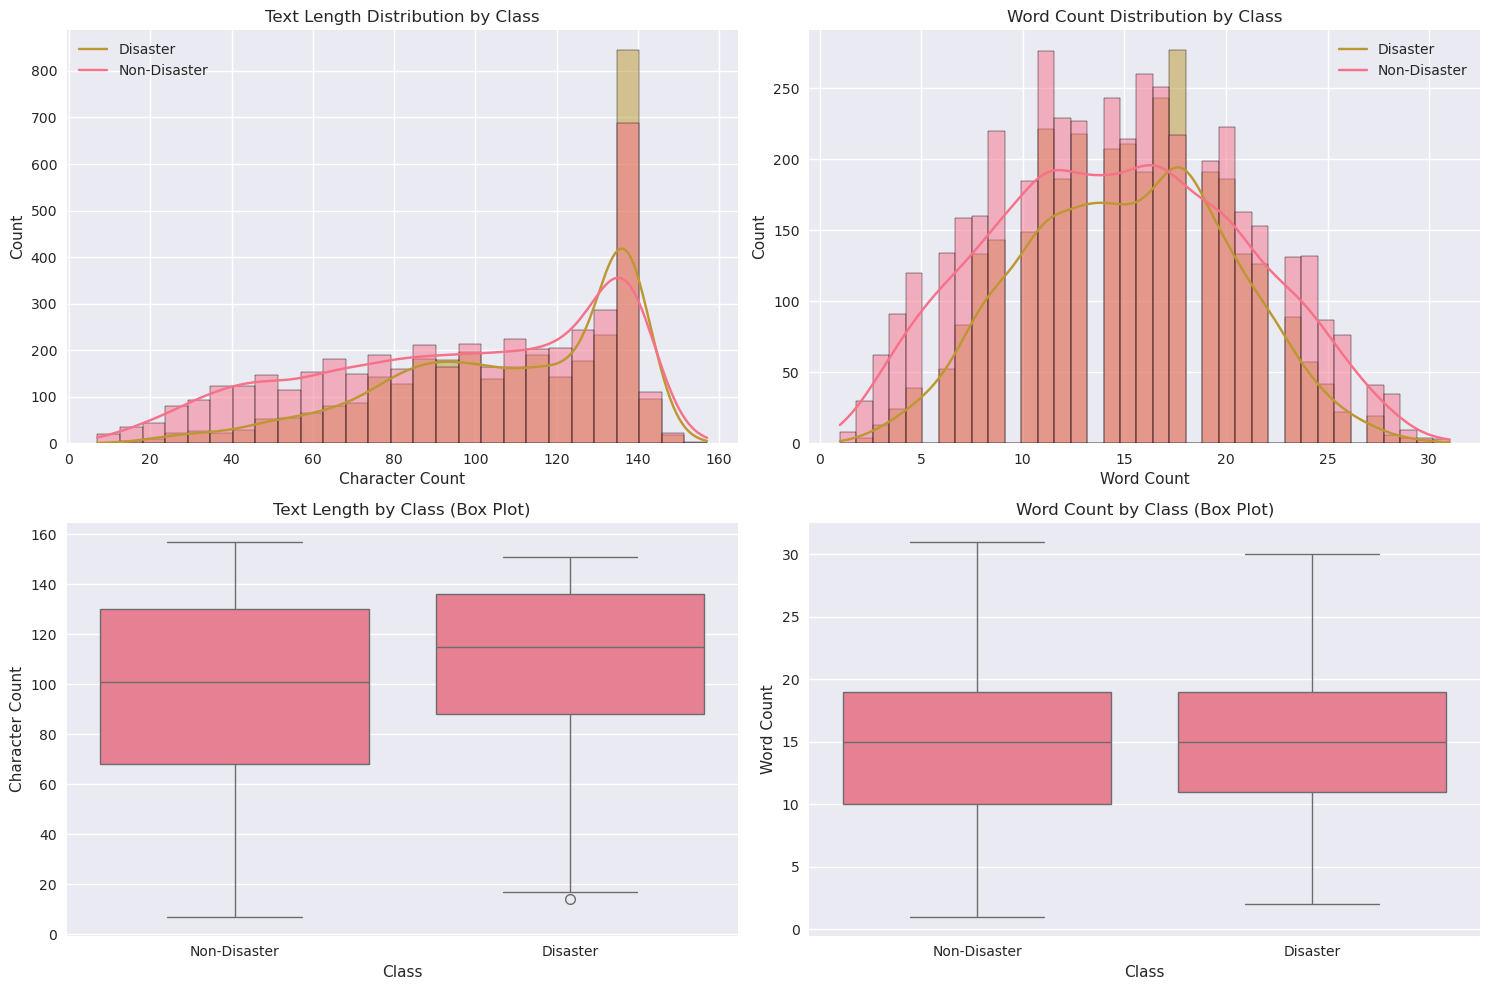

In [19]:
# Visualize text length distribution
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Text length by class
sns.histplot(data=df_train, x='text_length', hue='target', kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Text Length Distribution by Class')
axes[0, 0].set_xlabel('Character Count')
axes[0, 0].legend(['Disaster', 'Non-Disaster'])

# Word count by class
sns.histplot(data=df_train, x='word_count', hue='target', kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Word Count Distribution by Class')
axes[0, 1].set_xlabel('Word Count')
axes[0, 1].legend(['Disaster', 'Non-Disaster'])

# Box plot for text length
sns.boxplot(data=df_train, x='target', y='text_length', ax=axes[1, 0])
axes[1, 0].set_title('Text Length by Class (Box Plot)')
axes[1, 0].set_xlabel('Class')
axes[1, 0].set_ylabel('Character Count')
axes[1, 0].set_xticklabels(['Non-Disaster', 'Disaster'])

# Box plot for word count
sns.boxplot(data=df_train, x='target', y='word_count', ax=axes[1, 1])
axes[1, 1].set_title('Word Count by Class (Box Plot)')
axes[1, 1].set_xlabel('Class')
axes[1, 1].set_ylabel('Word Count')
axes[1, 1].set_xticklabels(['Non-Disaster', 'Disaster'])

plt.tight_layout()
plt.show()

## 1.5 Keyword Analysis

Unique keywords in train: 221
Unique keywords in test: 221


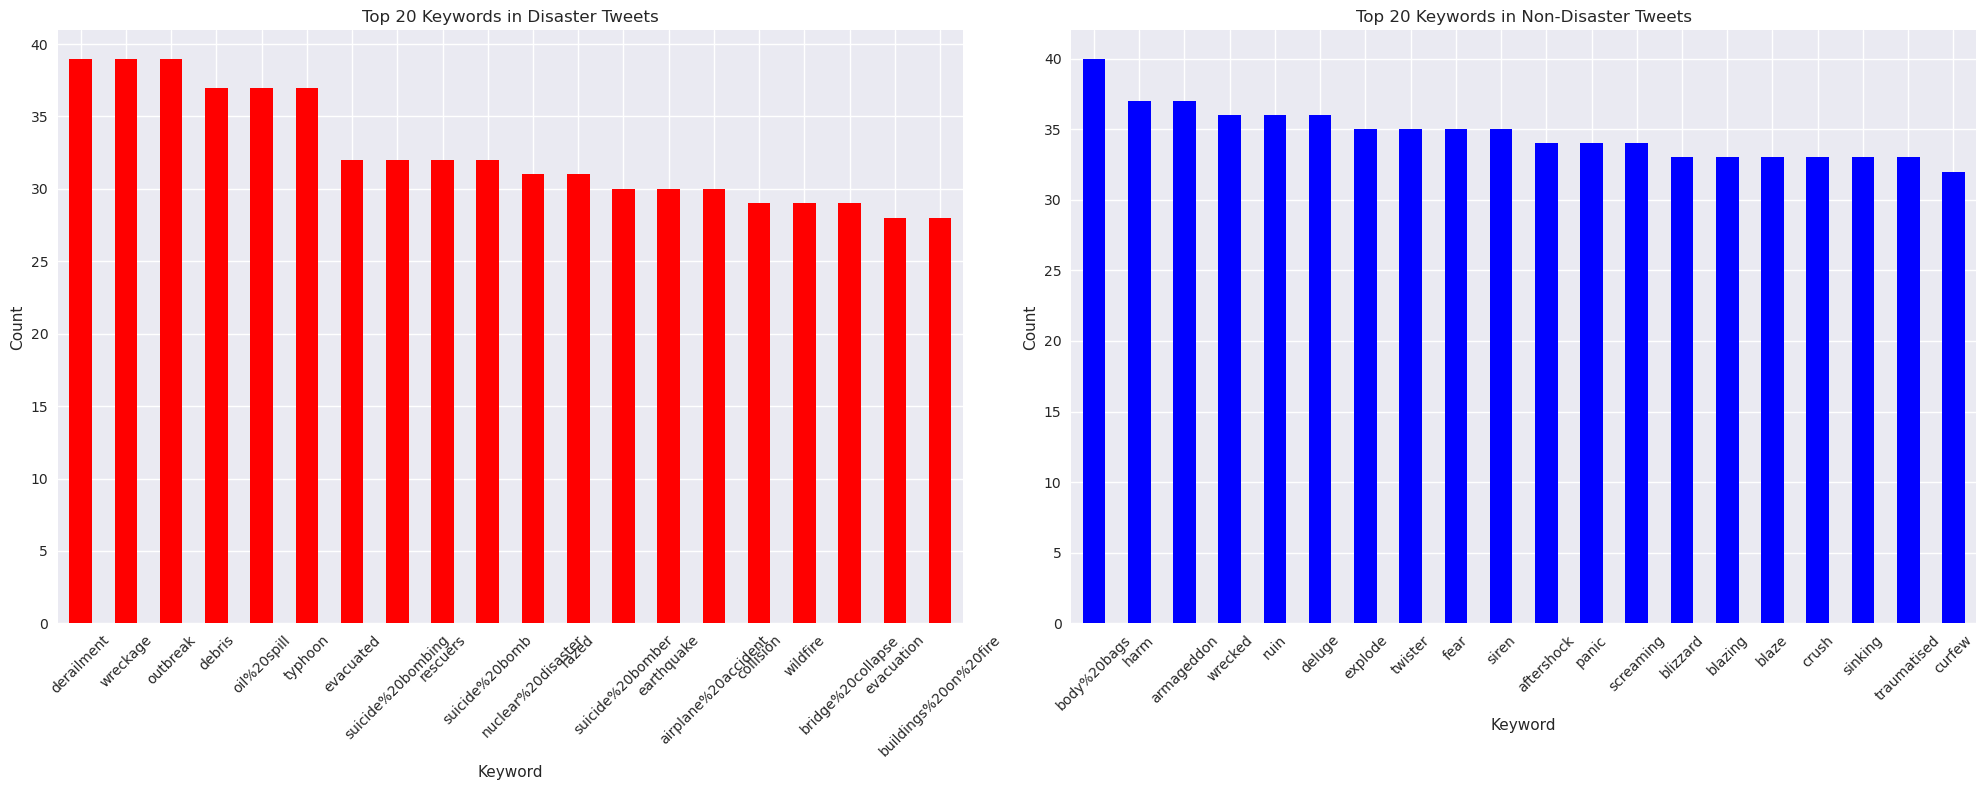

In [20]:
# Keywords analysis
print("Unique keywords in train:", df_train['keyword'].nunique())
print("Unique keywords in test:", df_test['keyword'].nunique())

# Top keywords by class
disaster_keywords = df_train[df_train['target'] == 1]['keyword'].value_counts().head(20)
non_disaster_keywords = df_train[df_train['target'] == 0]['keyword'].value_counts().head(20)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))

# Disaster keywords
disaster_keywords.plot(kind='bar', ax=ax1, color='red')
ax1.set_title('Top 20 Keywords in Disaster Tweets')
ax1.set_xlabel('Keyword')
ax1.set_ylabel('Count')
ax1.tick_params(axis='x', rotation=45)

# Non-disaster keywords
non_disaster_keywords.plot(kind='bar', ax=ax2, color='blue')
ax2.set_title('Top 20 Keywords in Non-Disaster Tweets')
ax2.set_xlabel('Keyword')
ax2.set_ylabel('Count')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 1.6 Location Analysis

Unique locations in train: 3341
Tweets with location info: {df_train['location'].notna().sum() / len(df_train) * 100:.1f}%


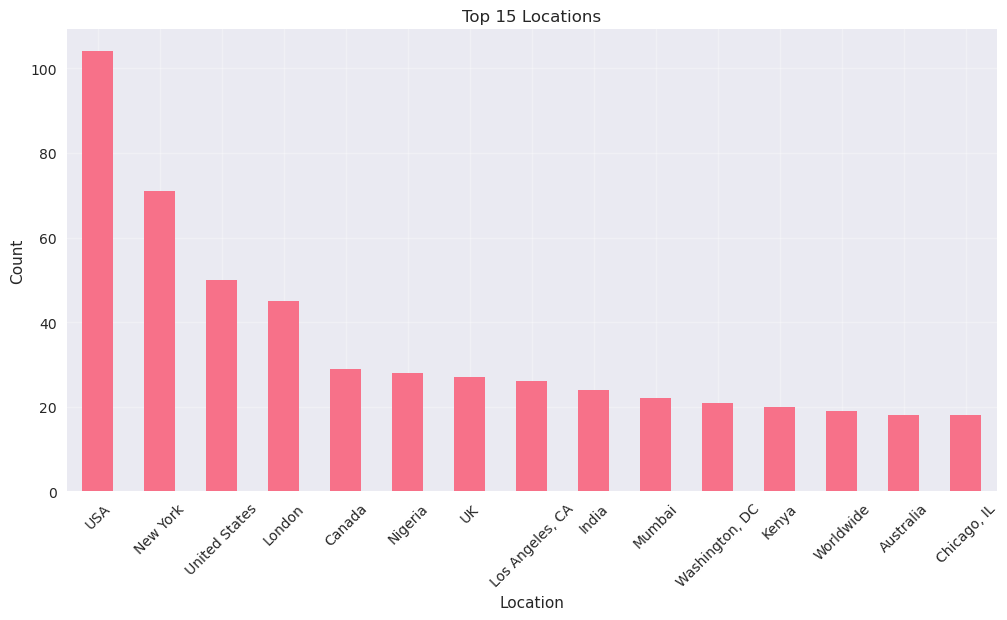

In [21]:
# Location analysis
print("Unique locations in train:", df_train['location'].nunique())
print("Tweets with location info: {df_train['location'].notna().sum() / len(df_train) * 100:.1f}%")

# Top locations
top_locations = df_train['location'].value_counts().head(15)

plt.figure(figsize=(12, 6))
top_locations.plot(kind='bar')
plt.title('Top 15 Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(alpha=0.3)
plt.show()

## 1.7 Sample Tweets by Class

In [22]:
# Display sample tweets
print("Sample Disaster Tweets:")
disaster_samples = df_train[df_train['target'] == 1]['text'].head(5)
for i, tweet in enumerate(disaster_samples, 1):
    print(f"{i}. {tweet}")

print("\n" + "="*50 + "\n")
print("Sample Non-Disaster Tweets:")
non_disaster_samples = df_train[df_train['target'] == 0]['text'].head(5)
for i, tweet in enumerate(non_disaster_samples, 1):
    print(f"{i}. {tweet}")

Sample Disaster Tweets:
1. Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all
2. Forest fire near La Ronge Sask. Canada
3. All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
4. 13,000 people receive #wildfires evacuation orders in California 
5. Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school 


Sample Non-Disaster Tweets:
1. What's up man?
2. I love fruits
3. Summer is lovely
4. My car is so fast
5. What a goooooooaaaaaal!!!!!!


## 1.8 Data Quality Assessment

In [23]:
# Check for duplicates
train_duplicates = df_train.duplicated().sum()
test_duplicates = df_test.duplicated().sum()

print(f"Duplicate rows in train: {train_duplicates}")
print(f"Duplicate rows in test: {test_duplicates}")

# Check for empty texts
empty_train = df_train['text'].str.strip().eq('').sum()
empty_test = df_test['text'].str.strip().eq('').sum()

print(f"\nEmpty texts in train: {empty_train}")
print(f"Empty texts in test: {empty_test}")

# Check for very short texts (< 10 characters)
short_train = (df_train['text'].str.len() < 10).sum()
short_test = (df_test['text'].str.len() < 10).sum()

print(f"\nVery short texts (< 10 chars) in train: {short_train}")
print(f"Very short texts (< 10 chars) in test: {short_test}")

Duplicate rows in train: 0
Duplicate rows in test: 0

Empty texts in train: 0
Empty texts in test: 0

Very short texts (< 10 chars) in train: 9
Very short texts (< 10 chars) in test: 6


## 1.9 Summary Statistics

In [24]:
# Summary statistics
summary_stats = {
    'Dataset': ['Training', 'Test'],
    'Total Samples': [len(df_train), len(df_test)],
    'Disaster %': [df_train['target'].mean() * 100, 'N/A'],
    'Non-Disaster %': [(1 - df_train['target'].mean()) * 100, 'N/A'],
    'Avg Text Length': [df_train['text_length'].mean(), df_test['text_length'].mean()],
    'Avg Word Count': [df_train['word_count'].mean(), df_test['word_count'].mean()],
    'Unique Keywords': [df_train['keyword'].nunique(), df_test['keyword'].nunique()],
    'Unique Locations': [df_train['location'].nunique(), df_test['location'].nunique()]
}

summary_df = pd.DataFrame(summary_stats)
print("Dataset Summary Statistics:")
display(summary_df.round(2))

Dataset Summary Statistics:


,Dataset,Total Samples,Disaster %,Non-Disaster %,Avg Text Length,Avg Word Count,Unique Keywords,Unique Locations
0,Training,7613,42.965979,57.034021,101.16,14.90,221,3341
1,Test,3263,N/A,N/A,102.24,14.97,221,1602


## 1.10 Save Enhanced Data

Save the enhanced datasets with basic statistics for use in subsequent notebooks.

In [26]:
# Save enhanced datasets with basic statistics
df_train.to_csv('Data/train_enhanced.csv', index=False)
df_test.to_csv('Data/test_enhanced.csv', index=False)

print("✅ Enhanced datasets saved:")
print("- Data/train_enhanced.csv")
print("- Data/test_enhanced.csv")

# Save summary statistics
summary_df.to_csv('results/metrics/data_summary.csv', index=False)
print("\n✅ Summary statistics saved to results/metrics/data_summary.csv")

print("\n" + "="*60)
print("🎉 Data exploration completed successfully!")
print("Next: Feature Engineering (02_feature_engineering.ipynb)")
print("="*60)

✅ Enhanced datasets saved:
- Data/train_enhanced.csv
- Data/test_enhanced.csv

✅ Summary statistics saved to results/metrics/data_summary.csv

🎉 Data exploration completed successfully!
Next: Feature Engineering (02_feature_engineering.ipynb)
